In [1]:
using PyPlot

### Constructing a phantom
* This is the input of our simulation

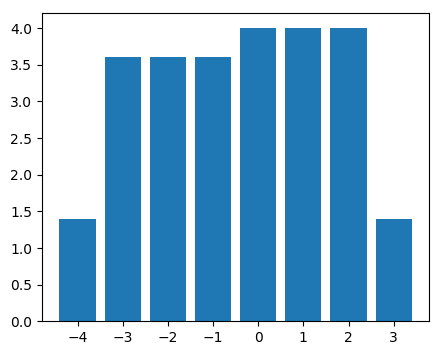

In [2]:
phantom = [1.4, 3.6, 3.6, 3.6, 4, 4, 4, 1.4]
location_label = -4:3 # in mm
x = location_label
fig = figure(figsize=(5,4));bar(location_label,phantom);

### Acquiring MR signals 
* The signals we receive, at any time point after an RF pulse excitation, will be the summation of all the magnetization vectors
* The 1024 data points we acquire at time = 1 to 1024 $\mu sec$ are
$$ S(t) = \sum_{n=1}^{8} phantom[n] \ \cdot \exp(i2\pi \omega t) \cdot \exp(-\frac{t}{T_2}) \\ with \ t = 1 \ to \ 1024 \ \mu sec, \ T_2 = 400 \mu sec $$ 

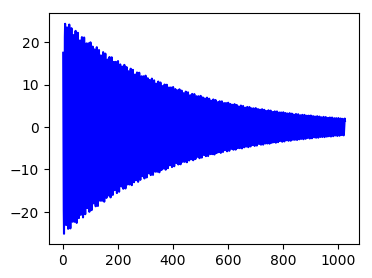

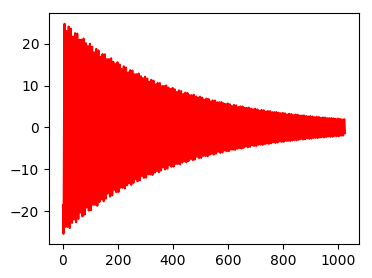

In [3]:
S = zeros(Complex{Float64},1024)
μ = 1e-6
t = (1:1024)μ
i = complex(0,1)
fieldStregth = 1.5
ω = 42.58e6 * fieldStregth
T2 = 400μ
for count = 1:1024
    S[count] = sum(phantom*exp(i*2*π*ω*t[count])*exp(-t[count]/T2))
end
fig = figure(figsize=(4,3));plot(1:1024,real.(S),"b")
fig = figure(figsize=(4,3));plot(1:1024,imag.(S),"r");


### Acquiring MR signals : rotating frame
* The 1024 data points we acquire at time = 1 to 1024 $\mu sec$ are
$$ S(t) = \sum_{n=1}^{8} phantom[n] \ \cdot \exp(i2\pi \Delta \omega t) \cdot \exp(-\frac{t}{T_2}) \\ with \ \Delta \omega = \omega - \omega_0 ; \ t = 1 \ to \ 1024 \ \mu sec; \ T_2 = 400 \mu sec $$ 

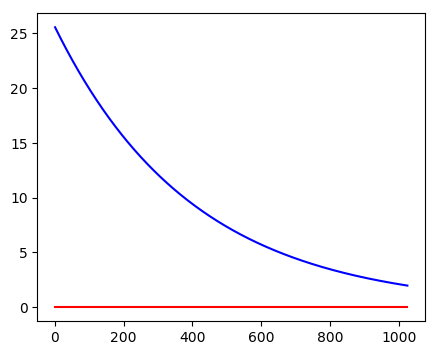

In [4]:
S = zeros(Complex{Float64},1024)
μ = 1e-6
t = (1:1024)μ
i = complex(0,1)
fieldStregth = 1.5
ω = 42.58e6 * fieldStregth
ω0 = 42.58e6 * fieldStregth
Δω = ω-ω0
T2 = 400μ
for count = 1:1024
    S[count] = sum(phantom*exp(i*2*π*Δω*t[count])*exp(-t[count]/T2))
end
fig = figure(figsize=(5,4)); plot(1:1024,real.(S),"b",1:1024,imag.(S),"r");

### Acquiring MR signals : rotating frame
* The 8 data points we acquire at time = [0,10,20,30,40,50,60,70] $\mu sec$ are
$$ S(t) = \sum_{n=1}^{8} phantom[n] \ \cdot \exp(i2\pi \Delta \omega t) \cdot \exp(-\frac{t}{T_2}) \\ with \ \Delta \omega = \omega - \omega_0 ; \ t = 0 \ to \ 70 \ \mu sec; \ T_2 = 100 msec $$ 

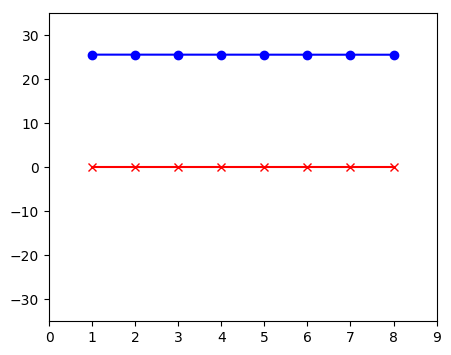

In [5]:
S = zeros(Complex{Float64},8)
μ = 1e-6
t =  [0,10,20,30,40,50,60,70]μ
i = complex(0,1)
fieldStregth = 1.5
ω = 42.58e6 * fieldStregth
ω0 = 42.58e6 * fieldStregth
Δω = ω-ω0
T2 = 100e-3
for count = 1:8
    S[count] = sum(phantom*exp(i*2*π*Δω*t[count])*exp(-t[count]/T2))
end
fig = figure(figsize=(5,4)); plot(1:8,real.(S),"-ob",1:8,imag.(S),"-xr");axis([0,9,-35,35]);

### Acquiring MR signals : rotating frame: in the presence of $B_0$ field gradient
* The 8 data points we acquire at time = [0,10,20,30,40,50,60,70] $\mu sec$ are
$$ \\ S(t) = \sum_{n=1}^{8} phantom[n] \ \cdot \exp(i2\pi \Delta \omega t) \cdot \exp(-\frac{t}{T_2}) \\ with \ \Delta \omega = \omega - \omega_0 + G\cdot x[n] \\ G = 100000 \frac{Hz}{FOV} = \frac{100000}{8} \frac{Hz}{pixel} = \frac{100000}{8} \frac{Hz}{mm} \\  t = 0,10,20 \ldots 70 \ \mu sec \\ T_2 = 100 \ msec $$

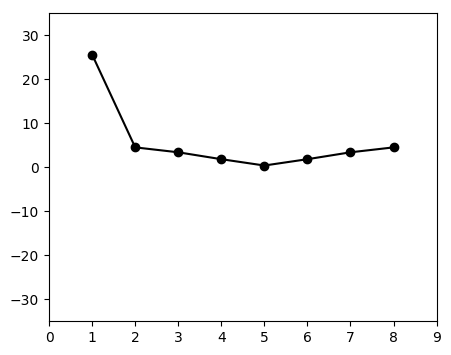

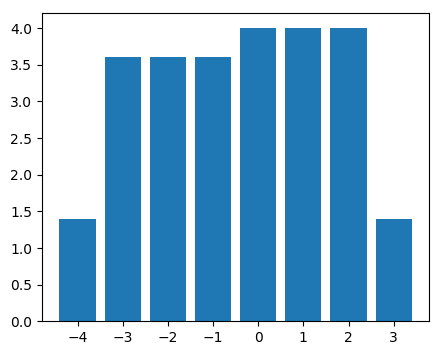

In [6]:
S = zeros(Complex{Float64},8)
μ = 1e-6
t =  [0,10,20,30,40,50,60,70]μ
i = complex(0,1)
fieldStregth = 0.1
ω = 42.58e6 * fieldStregth
ω0 = 42.58e6 * fieldStregth
Δω = ω-ω0
T2 = 100e-3
G = 100000/8
for count = 1:8
    S[count] = sum(phantom.*exp.(i*2*π*G*x*t[count]).*exp(i*2*π*Δω*t[count]).*exp(-t[count]/T2))
end
fig = figure(figsize=(5,4)); plot(1:8,abs.(S),"-ko");axis([0,9,-35,35]);
reconstructedData = real.(fftshift(fft(S)))/8;
fig = figure(figsize=(5,4)); bar(location_label,reconstructedData);

### Pulse sequence: gradient waveform and ADC
* The gradient strength is $\frac{100000}{8} \frac{Hz}{mm}$ between 0 and 70 $\mu sec $, and 0 afterward
* ADC : also from 0 to 70 $\mu sec$

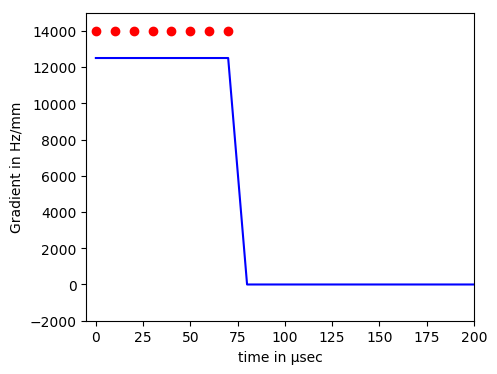

PyObject <matplotlib.text.Text object at 0x122c98890>

In [7]:
timeAxis = 0:10:200
gradientStrength = zeros(size(timeAxis))
gradientStrength[1:8] = 100000/8.
ADC=[1,1,1,1,1,1,1,1]*14000
figure(figsize=(5,4)); plot(timeAxis, gradientStrength,"-b",timeAxis[1:8],ADC,"ro"); axis([-5,200,-2000,120000/8]); xlabel("time in μsec"); ylabel("Gradient in Hz/mm")

### How were signals generated for those 8 time points (before combining signals from different x-positions)?
* pulse sequence and hardware dependent
* __subject dependent__

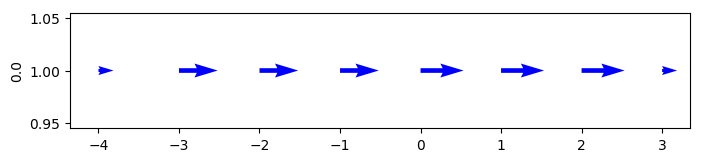

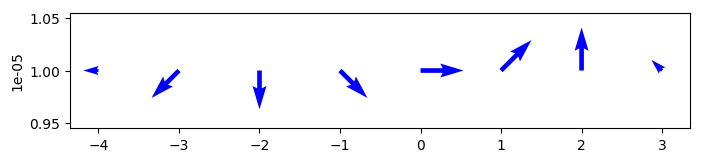

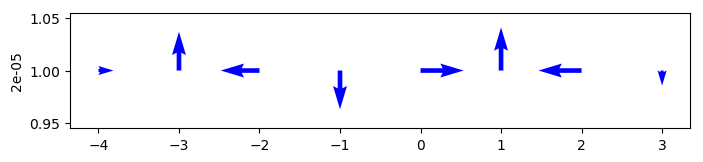

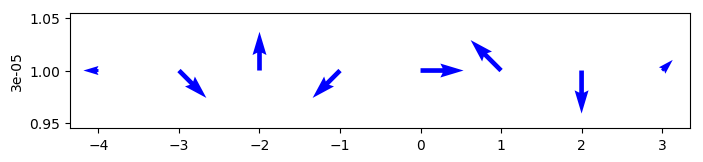

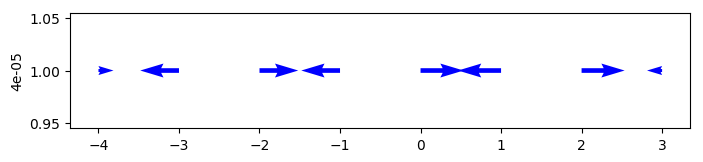

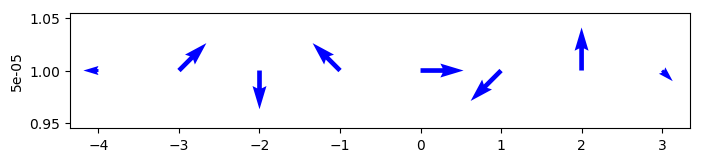

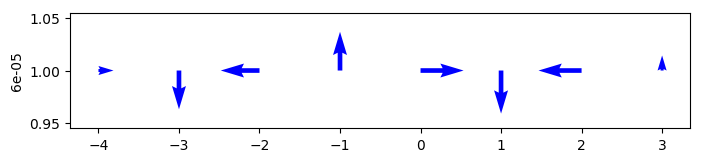

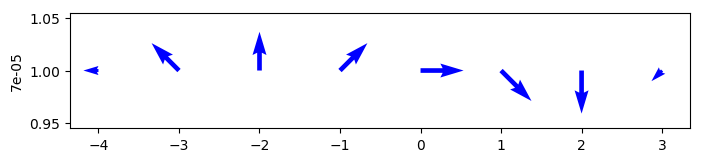

In [8]:
for count = 1:8
    show_xμsec = phantom.*exp.(i*2*π*G*x*t[count]).*exp(-t[count]/T2); 
    figure(count,figsize=(8,1.5));quiver(-4:3, ones(8), real(show_xμsec), imag(show_xμsec), color="blue");ylabel(t[count])
end

### How was the MR system prepared by the pulse sequence?
* pulse sequence and hardware dependent
* __subject independent__

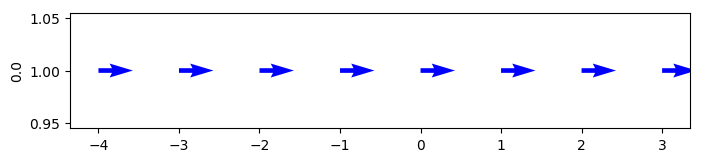

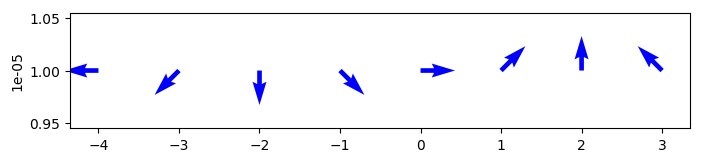

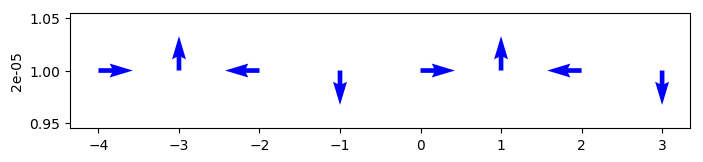

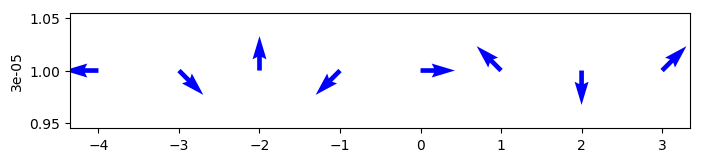

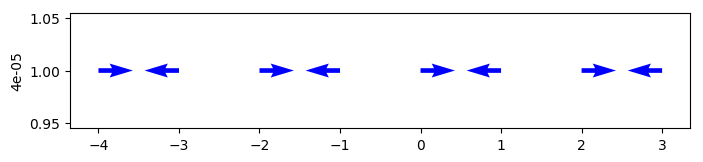

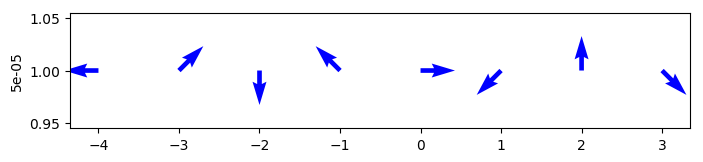

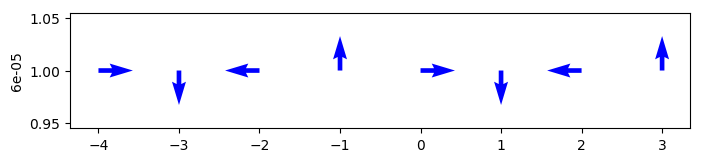

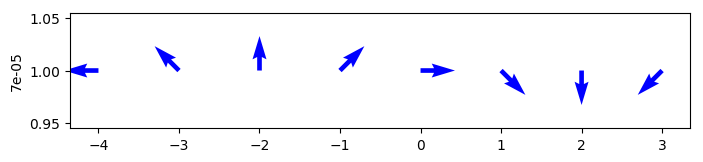

In [9]:
for count = 1:8
    show_0μsec = exp.(i*2*π*G*x*t[count]); 
    figure(count,figsize=(8,1.5));quiver(-4:3, ones(8), real(show_0μsec), imag(show_0μsec), color="blue");ylabel(t[count])
end

### k-encoding
We can generalize this equation $$ \\ S(t) = \sum_{n=1}^{8} phantom[n] \ \cdot \exp(\ i \ 2 \ \pi \ \Delta \omega \ t) \cdot \exp(-\frac{t}{T_2}) \\ with \ \Delta \omega =  G\cdot x[n]  $$

to this form $$ \\ S(t) = \sum_{n=1}^{8} phantom[n] \ \cdot \exp(\ i \ 2 \ \pi \ k(t) \ x[n]) \cdot \exp(-\frac{t}{T_2}) \\ where \ k(t) = \int_0^t G(t) \ dt $$


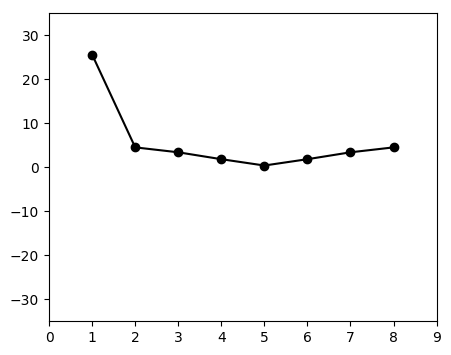

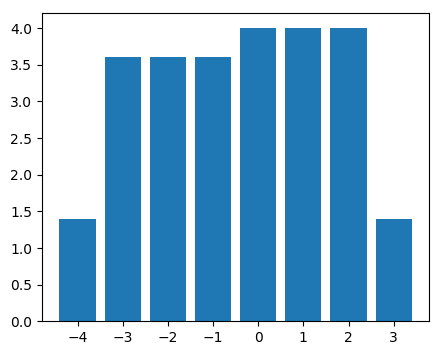

In [10]:
S = zeros(Complex{Float64},8)
μ = 1e-6
t =  [0,10,20,30,40,50,60,70]μ
time_increment = 10μ
i = complex(0,1)
fieldStregth = 0.1
T2 = 100e-3
G = [0, 100000/8,100000/8,100000/8,100000/8,100000/8,100000/8,100000/8,100000/8]
for count = 1:8
    k = sum(G[1:count]*time_increment)
    S[count] = sum(phantom.*exp.(i*2*π*k*x).*exp(-t[count]/T2))
end
fig = figure(figsize=(5,4)); plot(1:8,abs.(S),"-ko");axis([0,9,-35,35]);
reconstructedData = real.(fftshift(fft(S)))/8;
fig = figure(figsize=(5,4)); bar(location_label,reconstructedData);

### The second pulse sequence: gradient waveform and ADC
* The gradient strength is $-\frac{100000}{8} \frac{Hz}{mm}$ between 0 and 30 $\mu sec $, $\frac{100000}{8} \frac{Hz}{mm}$ between 40 and 140 $\mu sec $, and 0 afterward $\mu sec$
* ADC : turned on from 70 to 140 $\mu sec$

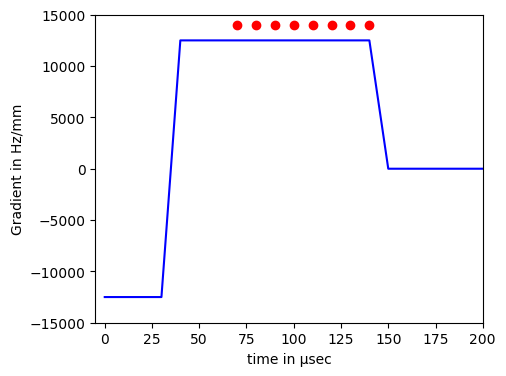

PyObject <matplotlib.text.Text object at 0x12c696690>

In [11]:
timeAxis = 0:10:200
gradientStrength = zeros(size(timeAxis))
gradientStrength[1:4] = -100000/8.
gradientStrength[5:15] = 100000/8.
ADC=[1,1,1,1,1,1,1,1]*14000
figure(figsize=(5,4)); plot(timeAxis, gradientStrength,"-b",timeAxis[8:15],ADC,"ro"); axis([-5,200,-120000/8,120000/8]); xlabel("time in μsec"); ylabel("Gradient in Hz/mm")

### Acquiring MR signals with the second pulse sequence : rotating frame
* The 8 data points we acquire at time = [70,80,90,100,110,120,130,140] $\mu sec$ are
$$ \\ S(t) = \sum_{n=1}^{8} phantom[n] \ \cdot \exp(\ i \ 2 \ \pi \ k(t) \ x[n]) \cdot \exp(-\frac{t}{T_2}) \\ where \ k(t) = \int_0^t G(t) \ dt $$

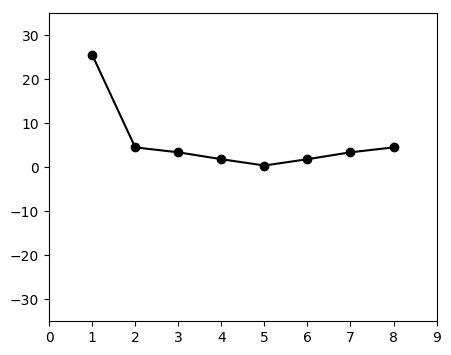

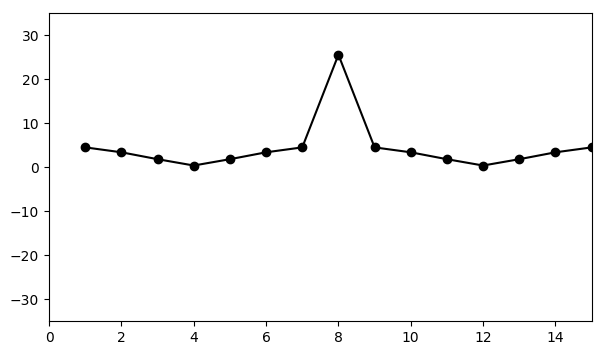

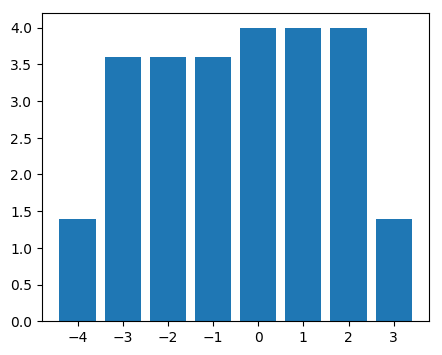

In [12]:
S = zeros(Complex{Float64},15)
μ = 1e-6
t =  [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140]μ
time_increment = 10μ
i = complex(0,1)
fieldStregth = 0.1
T2 = 100e-3
G = gradientStrength[1:15]
for count = 1:15
    k = sum(G[1:count]*time_increment)
    S[count] = sum(phantom.*exp.(i*2*π*k*x).*exp(-t[count]/T2))
end
S_adc = S[8:8+7]
fig = figure(figsize=(5,4)); plot(1:8,abs.(S_adc),"-ko");axis([0,9,-35,35]);
fig = figure(figsize=(7,4)); plot(1:15,abs.(S),"-ko");axis([0,15,-35,35]);
reconstructedData = real.(fftshift(fft(S_adc)))/8;
fig = figure(figsize=(5,4)); bar(location_label,reconstructedData);

### The third pulse sequence: gradient waveform and ADC
* The gradient strength is $-\frac{100000}{8} \frac{Hz}{mm}$ between 0 and 30 $\mu sec $, $\frac{100000}{8} \frac{Hz}{mm}$ between 40 and 140 $\mu sec $, and 0 afterward $\mu sec$
* ADC : turned on from 30 to 100 $\mu sec$

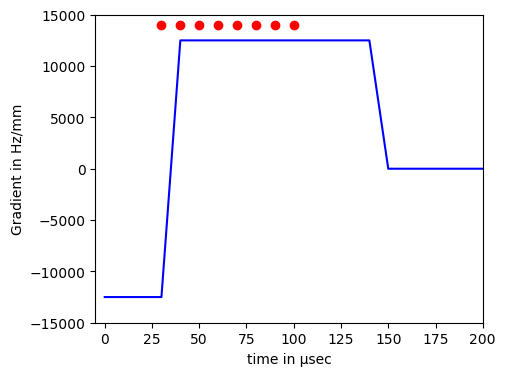

PyObject <matplotlib.text.Text object at 0x12c7f8790>

In [13]:
timeAxis = 0:10:200
gradientStrength = zeros(size(timeAxis))
gradientStrength[1:4] = -100000/8.
gradientStrength[5:15] = 100000/8.
ADC=[1,1,1,1,1,1,1,1]*14000
figure(figsize=(5,4)); plot(timeAxis, gradientStrength,"-b",timeAxis[4:11],ADC,"ro"); axis([-5,200,-120000/8,120000/8]); xlabel("time in μsec"); ylabel("Gradient in Hz/mm")

### Acquiring MR signals with the third pulse sequence : rotating frame
* The 8 data points we acquire at time = [30,40,50,60,70,80,90,100] $\mu sec$ are
$$ \\ S(t) = \sum_{n=1}^{8} phantom[n] \ \cdot \exp(\ i \ 2 \ \pi \ k(t) \ x[n]) \cdot \exp(-\frac{t}{T_2}) \\ where \ k(t) = \int_0^t G(t) \ dt $$

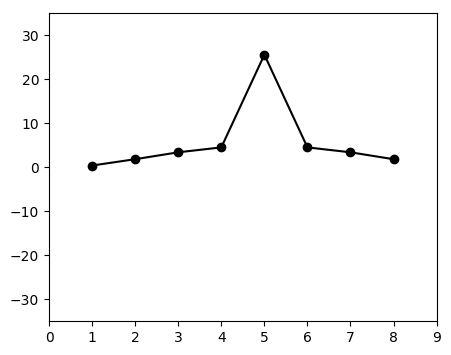

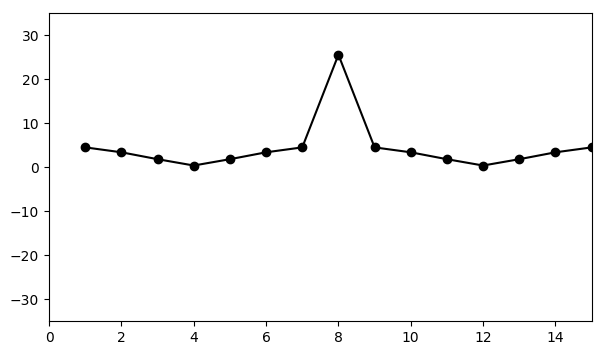

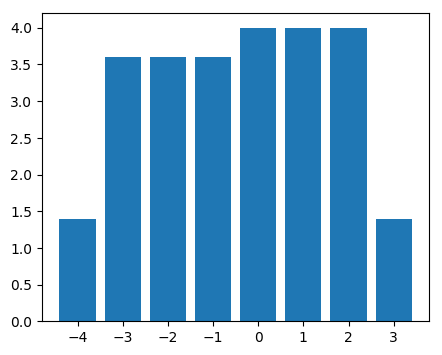

In [14]:
S = zeros(Complex{Float64},15)
μ = 1e-6
t =  [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140]μ
time_increment = 10μ
i = complex(0,1)
fieldStregth = 0.1
T2 = 100e-3
G = gradientStrength[1:15]
for count = 1:15
    k = sum(G[1:count]*time_increment)
    S[count] = sum(phantom.*exp.(i*2*π*k*x).*exp(-t[count]/T2))
end
S_adc = S[4:4+7]
fig = figure(figsize=(5,4)); plot(1:8,abs.(S_adc),"-ko");axis([0,9,-35,35]);
fig = figure(figsize=(7,4)); plot(1:15,abs.(S),"-ko");axis([0,15,-35,35]);
reconstructedData = real.(fftshift(fft(fftshift(S_adc))))/8;
fig = figure(figsize=(5,4)); bar(location_label,reconstructedData);